In [44]:
# Built-in modules
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2
import progressbar

In [45]:
files = glob("../kaggle_data/train/*.jpeg")

In [46]:
len(files)

35126

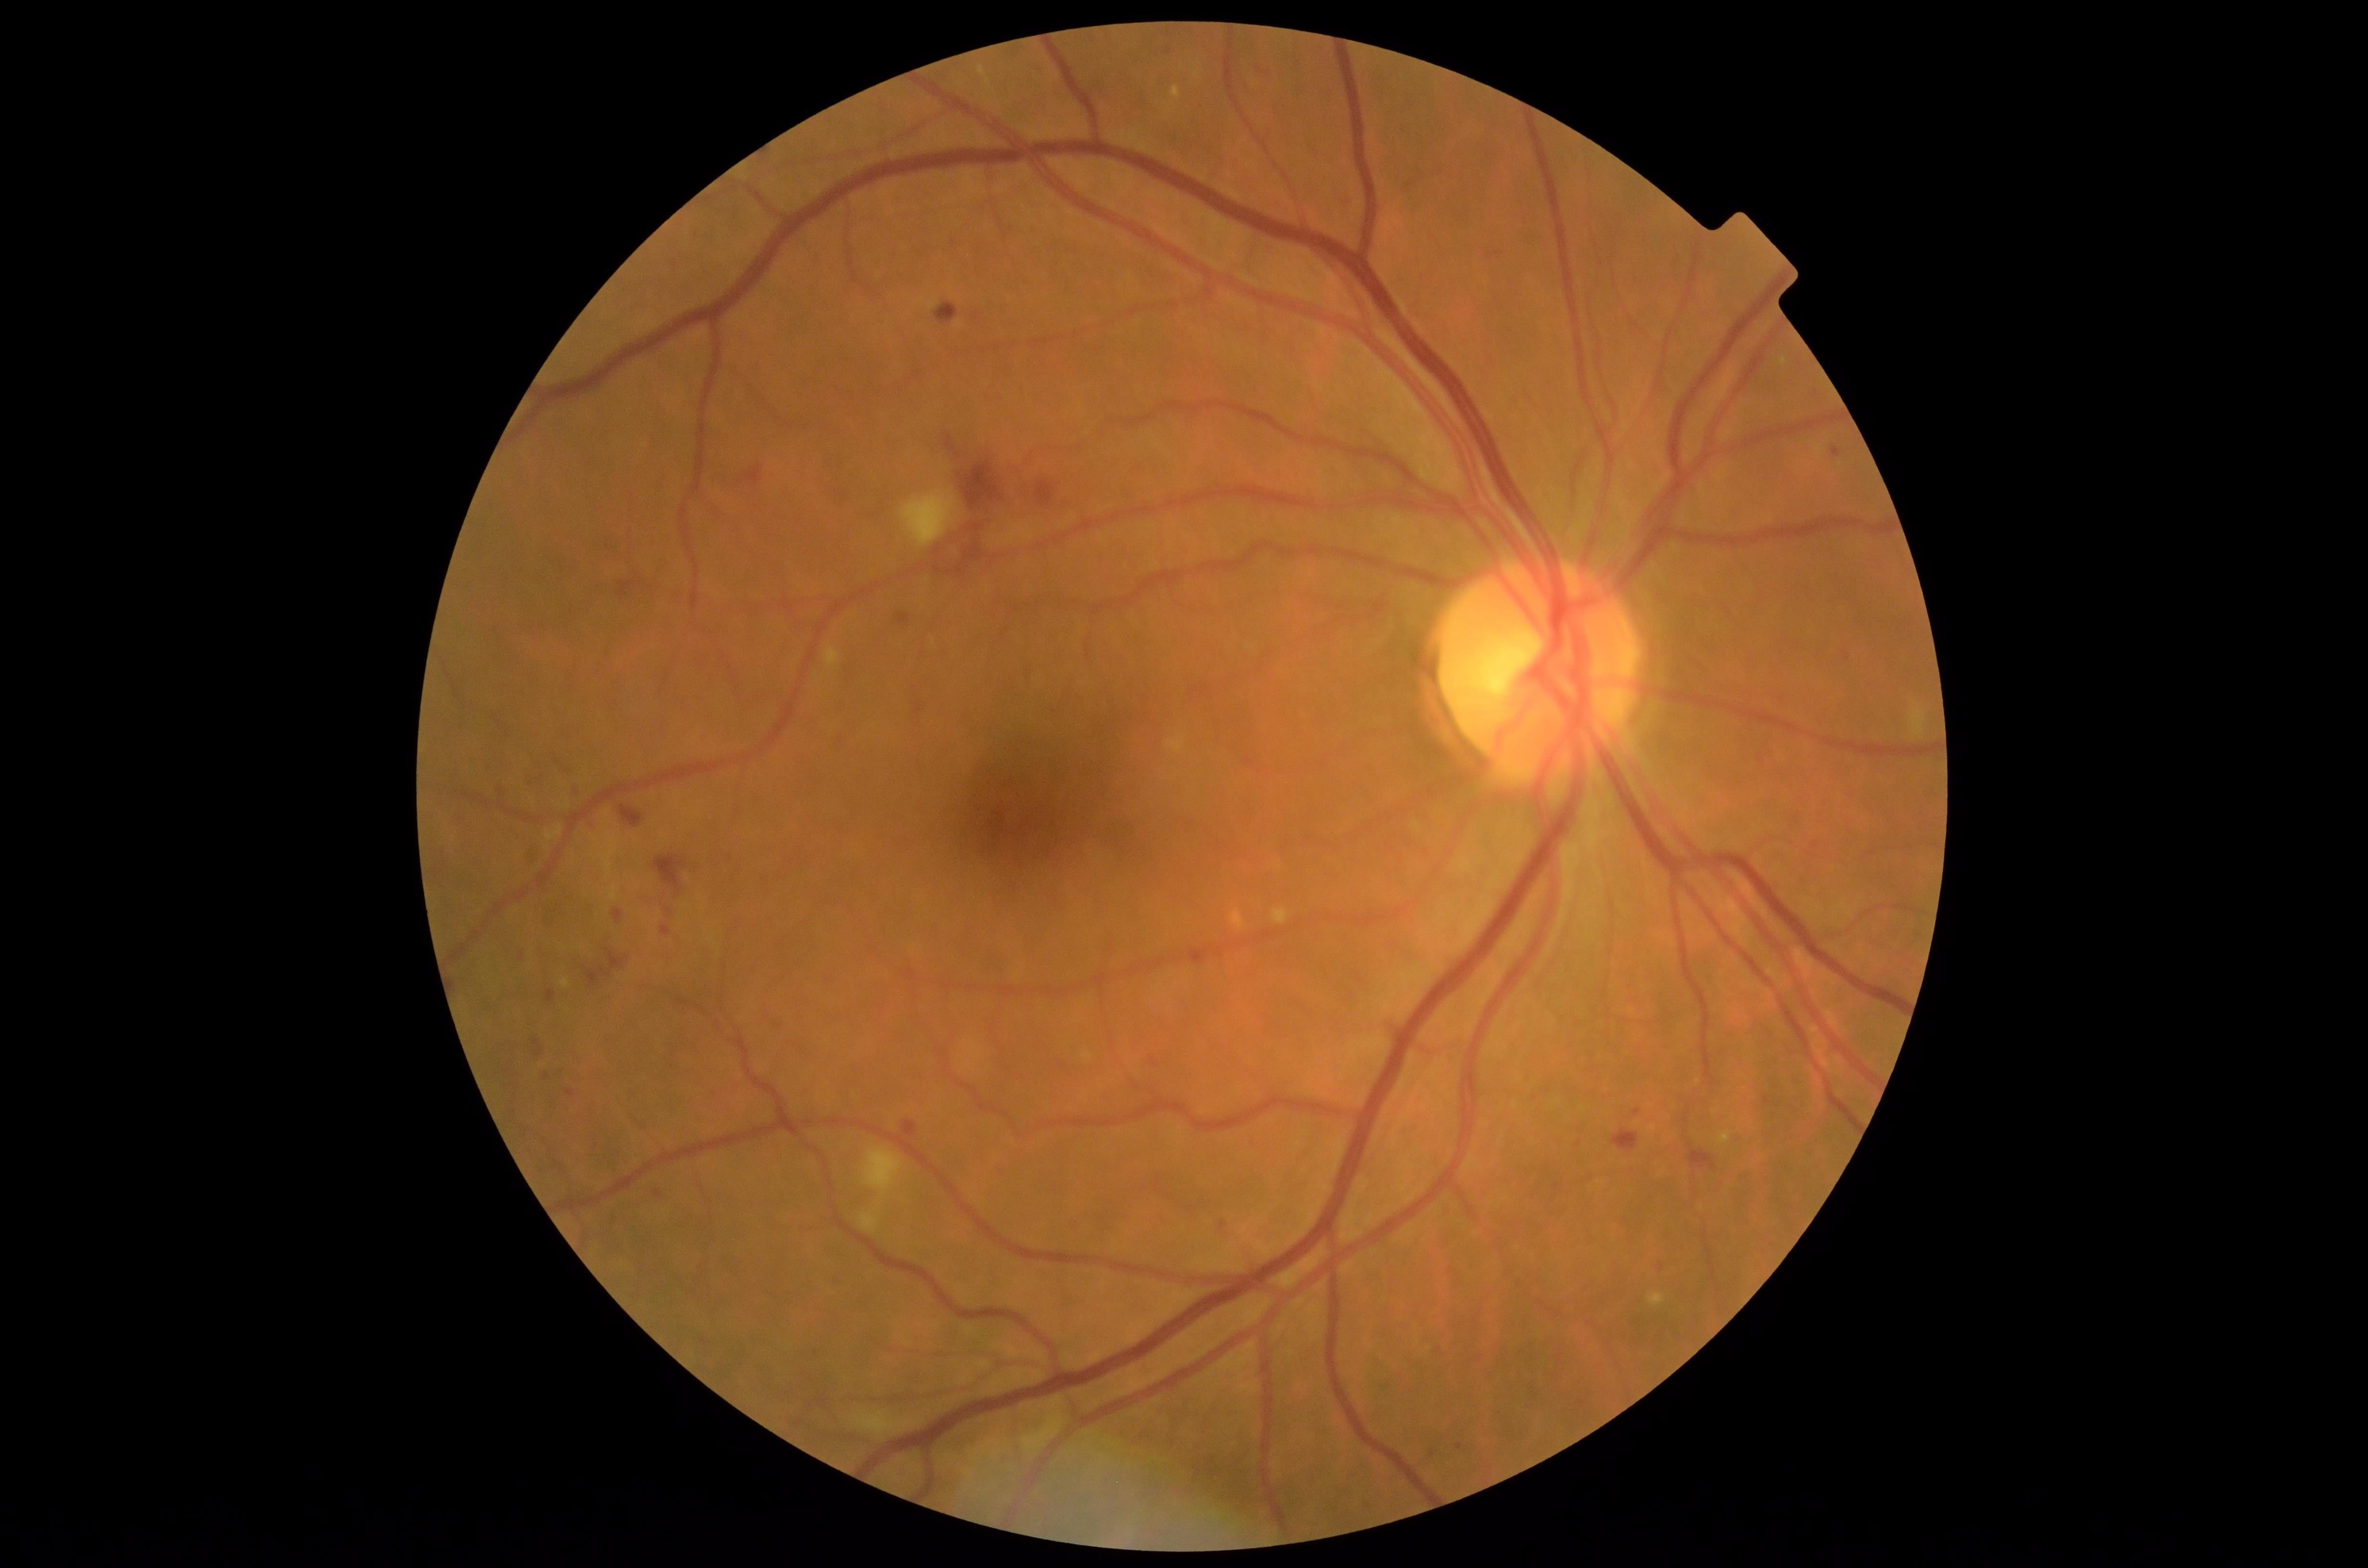

In [51]:
img = Image.open(files[300])
img

<a href="https://doorbw.tistory.com/172">Pandas</a>

In [52]:
df = pd.read_csv("../kaggle_data/trainLabels.csv")

In [53]:
df.head()

image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

<AxesSubplot:>

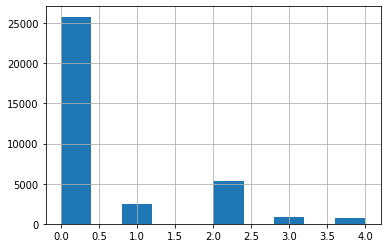

In [54]:
df.level.hist()

In [5]:
def crop_margin_PIL(image):
    """
    주변의 검정색을 지워 버립니다.
    :param path:
    :return:
    """
    im = image
    np_img = np.asarray(im)
    mean_pix = np.mean(np_img)
    pix = im.load()
    height, width = im.size  

    c_x, c_y = (int(height / 2), int(width / 2))
    for y in range(c_y):
        if sum(pix[c_x, y]) > mean_pix:
            left = (c_x, y)
            break;
    for x in range(c_x):
        if sum(pix[x, c_y]) > mean_pix:
            up = (x, c_y)
            break;

    crop_img = im.crop((up[0], left[1], left[0], up[1]))


    diameter_height = up[1] - left[1]
    diameter_width = left[0] - up[0]

    crop_img = im.crop((up[0], left[1], left[0] + diameter_width, up[1] + diameter_height))

    return crop_img

In [26]:
for f in progressbar.progressbar(files) :
    img = Image.open(f)
    try : 
        img = crop_margin_PIL(img)
    except : 
        img = img.resize((300,300))
        
    img = np.array(img)
    
    
    if img.shape[1] > img.shape[0] :
        padding = np.zeros(((img.shape[1]-img.shape[0])//2,img.shape[1],3))
        img = np.concatenate([padding,img,padding],axis=0)
    else :
        padding = np.zeros((img.shape[0],(img.shape[0]-img.shape[1])//2,3))
        img = np.concatenate([padding,img,padding],axis=1)
    
    
    img = Image.fromarray(img.astype("uint8"))
    img = img.resize((300,300))
    img.save(f)

100% (35126 of 35126) |##################| Elapsed Time: 2:04:02 Time:  2:04:02


In [31]:
def contrast_processing(img) :
    scale = 300
    img = np.asarray(img)
    
    blur_img = cv2.GaussianBlur(img,(0 ,0) , scale/30)
    merge_img = cv2.addWeighted(img , 4 , blur_img , -4 , 128)
    b = np.zeros(img.shape)
    cv2.circle(b , (int(scale/2) ,int(scale/2)) , int(scale) , (1,1,1), -1 , 8 , 0 )
    merge_img = merge_img * b + 128 * (1 - b)
    merge_img = merge_img.astype('uint8')
    
    merge_img = cv2.cvtColor(merge_img,cv2.COLOR_BGR2RGB)

    return merge_img


files = glob("../kaggle_data/train_resize_contrast/*.jpeg")

for f in files :
    img = Image.open(f)
    img = contrast_processing(img)
    cv2.imwrite(f,img)

In [55]:
df[df.level==3]

image  level
90         99_left      3
91        99_right      3
134       163_left      3
135      163_right      3
283      328_right      3
...            ...    ...
34915  44100_right      3
34961  44165_right      3
34994   44199_left      3
34996   44200_left      3
34997  44200_right      3

[873 rows x 2 columns]